<a href="https://colab.research.google.com/github/Akshat5129/Artificial-Intelligence/blob/main/Assignment_2_AU19B1023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf

In [43]:
from tensorflow import keras

In [44]:
import pandas as pd

In [45]:
import numpy as np

In [46]:
from sklearn import preprocessing,model_selection

In [47]:
import warnings

In [48]:
warnings.filterwarnings('ignore')

In [49]:
data=pd.read_csv('diabetes.csv')

In [50]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
data.shape

(768, 9)

In [52]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
X=data.drop('Outcome',axis=1)

In [55]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [56]:
Y=data['Outcome']

In [57]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [58]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(614, 8) (614,) (154, 8) (154,)


In [59]:
import tensorflow as tf

In [60]:
from tensorflow import keras

In [61]:
from tensorflow.keras import layers,callbacks

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
EarlyStopping= callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

In [64]:
model=keras.Sequential([
    layers.Dense(13,activation='relu',input_shape=[8]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(8,activation='relu'),
    layers.Dense(1)])

In [65]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [66]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=256,epochs=200,callbacks=[EarlyStopping],verbose=0)


In [67]:
history_df=pd.DataFrame(history.history)

In [68]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

In [69]:
history_df.describe()

,loss,val_loss
count,84.000000,84.000000
mean,4.612965,4.811990
std,0.144620,0.081848
min,4.321579,4.705282
25%,4.491157,4.718732
50%,4.590867,4.804499
75%,4.708175,4.881467
max,5.002887,4.952143


In [72]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

In [73]:
history_df['loss']

0     5.002887
1     4.926563
2     4.908375
3     4.772425
4     4.734026
        ...   
79    4.648128
80    4.407460
81    4.475685
82    4.534626
83    4.491497
Name: loss, Length: 84, dtype: float64

In [74]:
history_df['loss'].min()

4.321578502655029

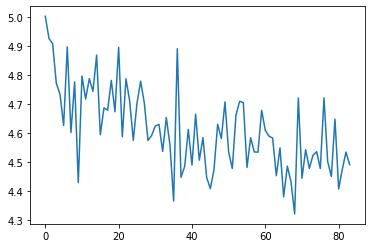

In [75]:
history_df.loc[:,'loss'].plot()

In [76]:
Y_test.describe()

count    154.000000
mean       0.324675
std        0.469781
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [77]:
Y_test.max()

1

In [78]:
print(type(Y_test))

<class 'pandas.core.series.Series'>


In [79]:
accuracy=model.evaluate(X,Y)

24/24 [==============================] - 0s 2ms/step - loss: 4.7320


In [80]:
print(accuracy*100)

473.2004642486572


In [81]:
data['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64